# Preprocessing Data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression, SelectPercentile
from sklearn.grid_search import GridSearchCV
import pickle
import csv
np.random.seed(42)


%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Load in training data

In [2]:
df = pd.read_csv('../Data/train.csv', index_col='Id')
kaggle = pd.read_csv('../Data/test.csv', index_col = 'Id')

Move this further down

In [3]:
df.drop(labels =182, axis = 0, inplace=True) # Shows a strong correlation to __

In [4]:
df.drop(labels =1554, axis = 0, inplace=True) # Shows a strong correlation to __

In [5]:
df.drop(labels =471, axis = 0, inplace=True) # Large outlier

In [6]:
df.drop(labels =694, axis = 0, inplace=True) # Large outlier

In [7]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

### Quick evaluation of the data shows some variables that can immediately be dropped due to redundancy, colinearity, and/or lack of values.

In [8]:
df.drop(['Condition 2', 
         'Year Remod/Add', 
         'Roof Matl', 
         'Exterior 2nd', 
         'Low Qual Fin SF',
         'Fireplace Qu',
         'BsmtFin Type 2',
         'Garage Yr Blt'], 
        axis=1, 
        inplace=True)

In [9]:
df_num_corr = df.corr()['SalePrice']
df_num_corr[abs(df_num_corr) > 0.5]


Overall Qual     0.799490
Year Built       0.571149
Mas Vnr Area     0.512234
Total Bsmt SF    0.627953
1st Flr SF       0.618125
Gr Liv Area      0.696307
Full Bath        0.537153
TotRms AbvGrd    0.502920
Garage Cars      0.650192
Garage Area      0.653531
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [10]:
df_num_corr = df.corr()['SalePrice']
df_num_corr[abs(df_num_corr) > 0.5]

Overall Qual     0.799490
Year Built       0.571149
Mas Vnr Area     0.512234
Total Bsmt SF    0.627953
1st Flr SF       0.618125
Gr Liv Area      0.696307
Full Bath        0.537153
TotRms AbvGrd    0.502920
Garage Cars      0.650192
Garage Area      0.653531
SalePrice        1.000000
Name: SalePrice, dtype: float64

### Convert the following numerical features into objects, then one-hot encode for further testing

In [11]:
df['Overall Qual'] = df['Overall Qual'].astype(object)
df['Overall Cond'] = df['Overall Cond'].astype(object)
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].astype(object)
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].astype(object)
df['Full Bath'] = df['Full Bath'].astype(object)
df['Half Bath'] = df['Half Bath'].astype(object)
df['Fireplaces'] = df['Fireplaces'].astype(object)
df['Mo Sold'] = df['Mo Sold'].astype(object)
df['Year Built'] = df['Year Built'].astype(object)
df['Yr Sold'] = df['Yr Sold'].astype(object)

In [12]:
df_int = df.select_dtypes(include = ['object'])
kaggle_int = kaggle.select_dtypes(include = ['object'])

In [13]:
df_int.isnull().sum()

MS Zoning            0
Street               0
Alley             1908
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Roof Style           0
Exterior 1st         0
Mas Vnr Type        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           54
Bsmt Cond           54
Bsmt Exposure       57
BsmtFin Type 1      54
Heating              0
Heating QC           0
Central Air          0
Electrical           0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Kitchen Qual         0
Functional           0
Fireplaces           0
Garage Type        113
Garage Finish      114
Garage Qual        114
Garage Cond        114
Paved Drive          0
Pool QC           2038
Fence             1647
Misc Featur

In [14]:
#plt.figure(figsize=(10,10))
#df['Exter Qual'].fillna('0', inplace=True)
#plt.scatter(df['Heating'], df.SalePrice)

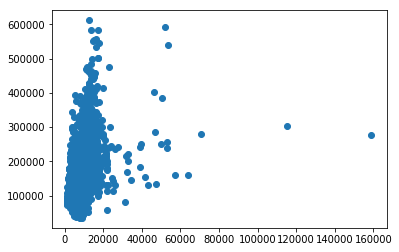

In [15]:
plt.scatter(df['Lot Area'], df.SalePrice)

In [16]:
df_int_d = pd.get_dummies(df_int, drop_first=True)
kaggle_int_d = pd.get_dummies(kaggle_int, drop_first=True)

In [17]:
df_int.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Roof Style', 'Exterior 1st', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Kitchen Qual', 'Functional', 'Fireplaces',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Mo Sold', 'Yr Sold',
       'Sale Type'],
      dtype='object')

In [18]:
df.drop(['PID', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Bldg Type', 'House Style', 'Roof Style',
       'Exterior 1st', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 
       'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'BsmtFin SF 2', 'Garage Cars', 'Lot Frontage'], axis=1, inplace=True)

In [19]:
df.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

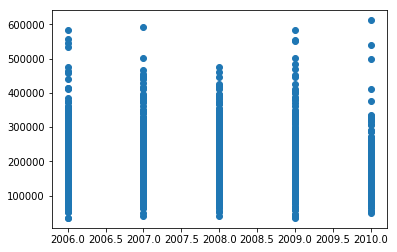

In [20]:
plt.scatter(df['Yr Sold'], df.SalePrice)

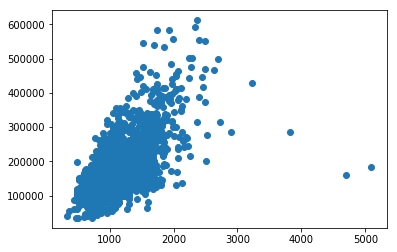

In [21]:
plt.scatter(df['1st Flr SF'], df.SalePrice)

In [22]:
kaggle.drop(['PID', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'BsmtFin SF 2'], axis=1, inplace=True)

In [23]:
df.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [24]:
df_con = pd.concat((df, df_int_d), axis=1)
df_con.fillna(0, inplace=True)
kaggle_con = pd.concat((kaggle, kaggle_int_d), axis=1)
kaggle_con.fillna(0, inplace=True)

In [25]:
df_con_corr = df_con.corr()['Pool Area'][:-1] 
golden_features_list = df_con_corr[abs(df_con_corr) > 0.5].sort_values(ascending=False)
print(golden_features_list)

Pool Area     1.000000
Pool QC_Gd    0.756112
Name: Pool Area, dtype: float64


In [26]:
df_con_corr = df_con.corr()['SalePrice'][:-1] 
golden_features_list = df_con_corr[abs(df_con_corr) > 0.5].sort_values(ascending=False)
print(golden_features_list)

SalePrice           1.000000
Overall Qual        0.799490
Gr Liv Area         0.696307
Garage Area         0.653156
Total Bsmt SF       0.628337
1st Flr SF          0.618125
Year Built          0.571149
Full Bath           0.537153
Foundation_PConc    0.529202
Mas Vnr Area        0.503567
TotRms AbvGrd       0.502920
Full Bath_1        -0.519032
Kitchen Qual_TA    -0.542967
Exter Qual_TA      -0.602519
Name: SalePrice, dtype: float64


# Assign X and y

# Scale the data

In [27]:
y = df['SalePrice']
X = df_con.drop(['SalePrice'], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
#with open('../data/X_train_.csv', 'w+') as f:
#    csv_writer = csv.writer(f)
#    csv_writer.writerows(X_train_sc)

X_train.to_pickle("../Data/X_train.pkl")

In [31]:
#with open('../data/X_test_sc.csv', 'w+') as f:
#    csv_writer = csv.writer(f)
#    csv_writer.writerows(X_test_sc)
    
X_test.to_pickle("../Data/X_test.pkl")

In [32]:
#y_train.to_csv('../Data/y_train.csv', index=False, header=False)
y_train.to_pickle("../Data/y_train.pkl")

In [33]:
#y_test.to_csv('../Data/y_test.csv', index=False, header=False)
y_test.to_pickle("../Data/y_test.pkl")

In [ ]:
with open('../assets/columns.pkl', 'wb+') as f:
    pickle.dump(list(X.columns), f)